## Comandos Linux
Comandos usados para extraer el dataset de Google Drive


In [ ]:
!unzip "/content/drive/MyDrive/ava.zip" -d "/"

## Inicio del código de Python

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, AveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, Adagrad
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
import numpy as np
import skimage
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
train_path = '/content/ava1/train'
valid_path = '/content/ava1/valid'
test_path = '/content/ava1/test'

In [ ]:
train_batches = ImageDataGenerator(rescale=1.0/255.0) \
                .flow_from_directory(directory=train_path, target_size=(256,256), batch_size=16)
valid_batches = ImageDataGenerator(rescale=1.0/255.0) \
                .flow_from_directory(directory=valid_path, target_size=(256,256), batch_size=16)
test_batches = ImageDataGenerator(rescale=1.0/255.0) \
                .flow_from_directory(directory=test_path, target_size=(256,256), batch_size=100, shuffle=True)

Found 9011 images belonging to 14 classes.
Found 1121 images belonging to 14 classes.
Found 1121 images belonging to 14 classes.


In [ ]:
imgs, labels = next(train_batches)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 10 columns where
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

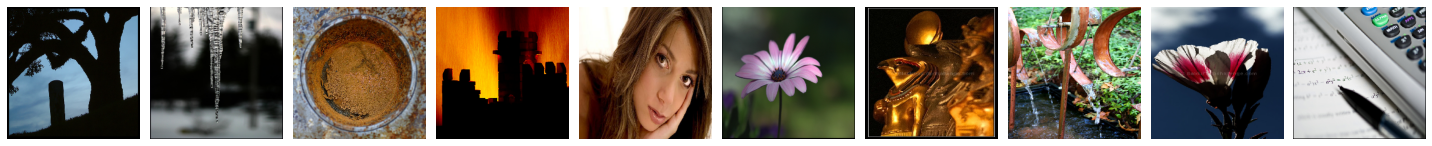

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(5,5), strides=5, activation='relu', padding='same', input_shape=(256,256,3)),
    MaxPool2D(pool_size=(3,3), strides=2, padding='same'),
    Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'),
    MaxPool2D(pool_size=(3,3), strides=2, padding='same'),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(3,3), strides=2, padding='same'),
    Flatten(),
    Dense(units=14, activation='softmax')
])


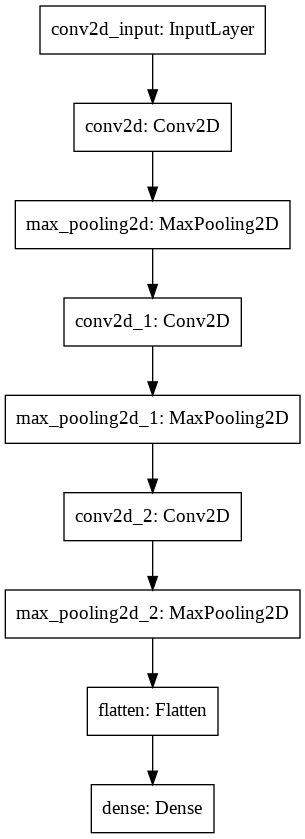

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 52, 52, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=train_batches, epochs=100, validation_data=valid_batches, verbose=1)

Epoch 1/100
 12/564 [..............................] - ETA: 52s - loss: 2.6653 - accuracy: 0.0868

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 211288080 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 131073 bytes but only got 10470. Skipping tag 582
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 196867 bytes but only got 10474. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 5. 
  warnings.warn(str(msg))


185/564 [========>.....................] - ETA: 40s - loss: 2.6275 - accuracy: 0.1366

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11046 bytes but only got 749. Skipping tag 700
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 9664 bytes but only got 749. Skipping tag 34377
  " Skipping tag %s" % (size, len(data), tag)


564/564 [==============================] - 83s 119ms/step - loss: 2.5909 - accuracy: 0.1533 - val_loss: 2.4640 - val_accuracy: 0.1873
Epoch 2/100
564/564 [==============================] - 66s 118ms/step - loss: 2.4328 - accuracy: 0.1938 - val_loss: 2.3453 - val_accuracy: 0.2070
Epoch 3/100
564/564 [==============================] - 66s 117ms/step - loss: 2.3320 - accuracy: 0.2294 - val_loss: 2.2809 - val_accuracy: 0.2435
Epoch 4/100
564/564 [==============================] - 66s 117ms/step - loss: 2.2680 - accuracy: 0.2540 - val_loss: 2.2408 - val_accuracy: 0.2587
Epoch 5/100
564/564 [==============================] - 66s 117ms/step - loss: 2.2432 - accuracy: 0.2528 - val_loss: 2.2233 - val_accuracy: 0.2640
Epoch 6/100
564/564 [==============================] - 67s 118ms/step - loss: 2.2001 - accuracy: 0.2706 - val_loss: 2.1986 - val_accuracy: 0.2774
Epoch 7/100
564/564 [==============================] - 67s 118ms/step - loss: 2.1984 - accuracy: 0.2684 - val_loss: 2.1784 - val_accurac

In [ ]:
model.save('ava_myown_14_3756.h5')

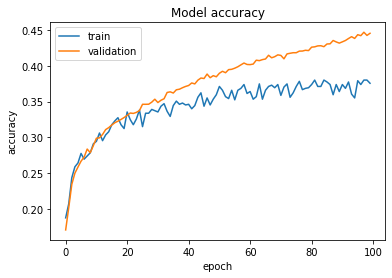

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('My own net.jpg')
plt.show()